<a href="https://colab.research.google.com/github/shytortoise19/heart-attack-prediction/blob/main/heart_attack_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn import metrics

In [ ]:
def model_eval(y,y_pred):
  acc=accuracy_score(y,y_pred)
  print("accuracy score:",acc)
  precision = precision_score(y, y_pred)
  recall = recall_score(y, y_pred)
  f1 = f1_score(y, y_pred)

  print(f"Precision: {precision:.2f}")
  print(f"Recall: {recall:.2f}")
  print(f"F1 Score: {f1:.2f}")

  cnf_matrix = metrics.confusion_matrix(y, y_pred)

  class_names=[0,1]
  fig, ax = plt.subplots(figsize=(4, 2))
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("bottom")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  results= {
        'Accuracy': acc,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cnf_matrix
    }
  return results


# Data

Age : Age of the patient\
Sex : Sex of the patient\
exang: exercise induced angina (1 = yes; 0 = no)\
ca: number of major vessels (0-3)\
cp : Chest Pain type chest pain type\
    Value 1: typical angina\
    Value 2: atypical angina\
    Value 3: non-anginal pain\
    Value 4: asymptomatic\
trtbps : resting blood pressure (in mm Hg)\
chol : cholestoral in mg/dl fetched via BMI sensor\
fbs : (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)\
rest_ecg : resting electrocardiographic results\
    Value 0: normal\
    Value 1: having ST-T wave abnormality (T wave inversions and/oR ST      elevation or depression of > 0.05 mV)\
    Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria\
thalach : maximum heart rate achieved\
target : 0= less chance of heart attack 1= more chance of heart attack\

In [ ]:
df=pd.read_csv('heart.csv')

In [ ]:
df.shape
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
df[df.duplicated()]


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [ ]:
df.drop_duplicates(inplace=True)
df.shape

(302, 14)

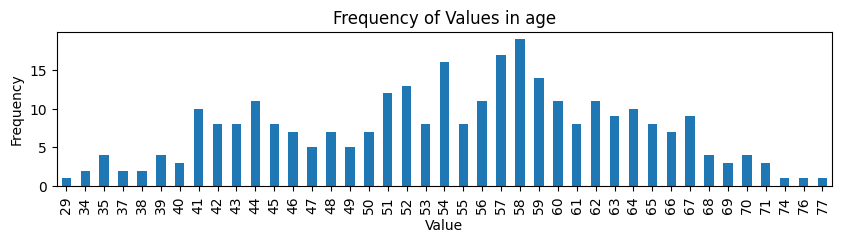

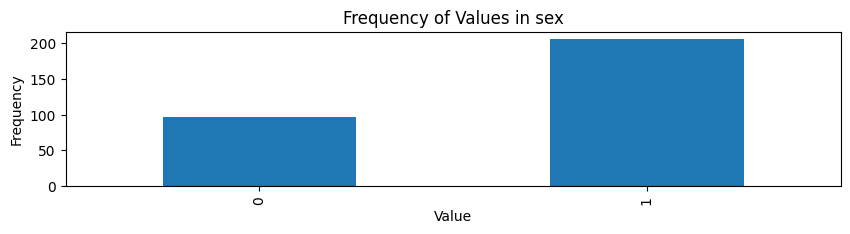

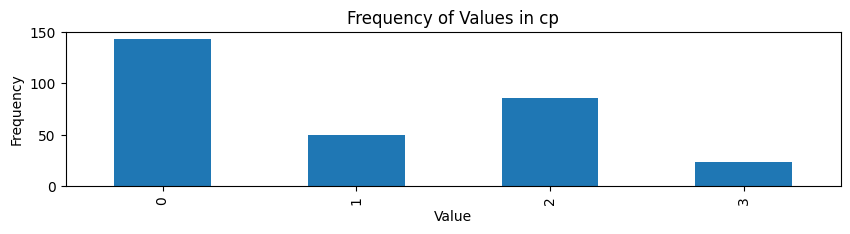

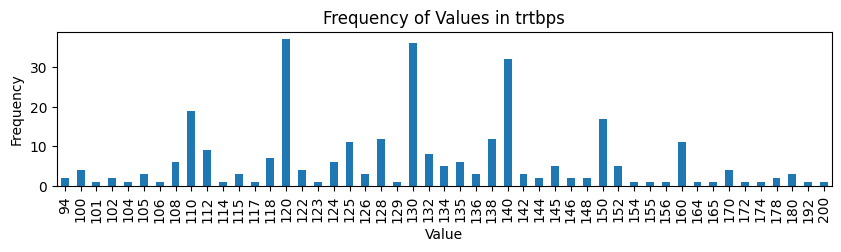

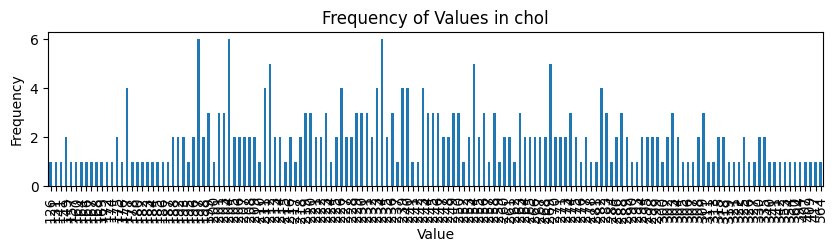

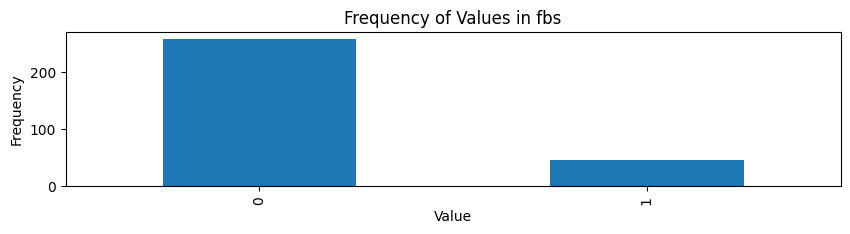

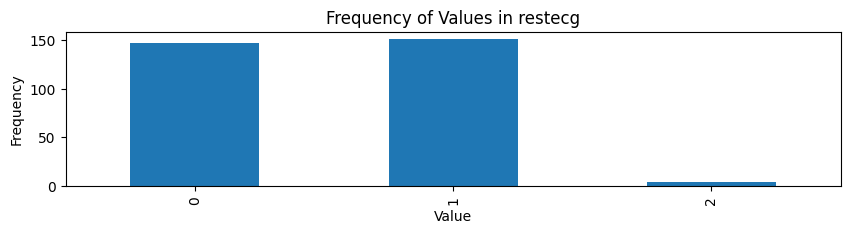

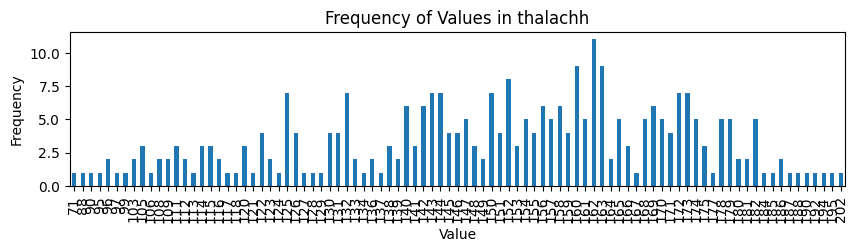

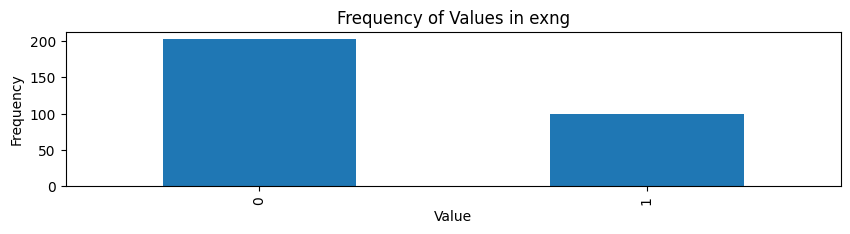

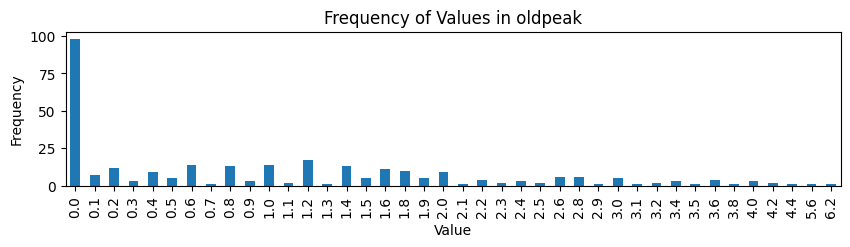

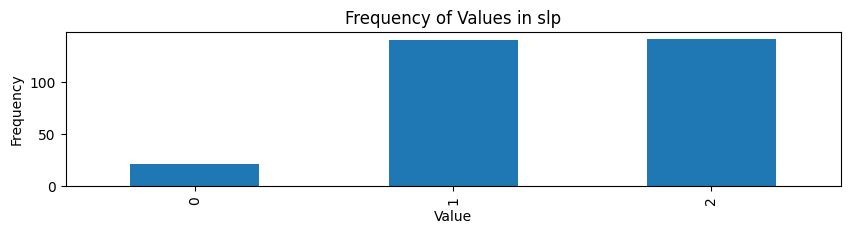

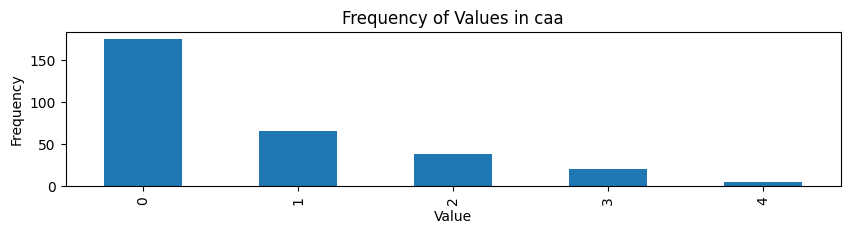

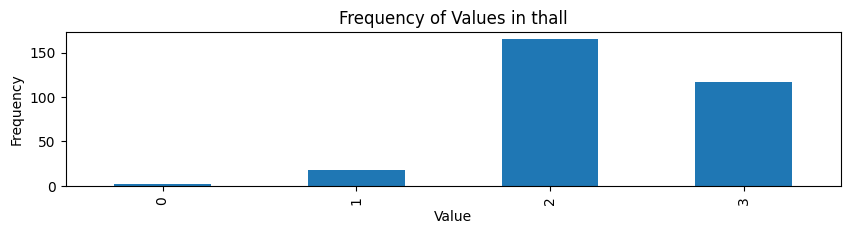

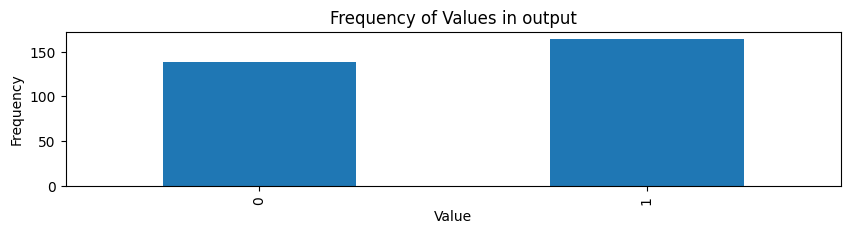

In [ ]:
for col in df.columns:
    plt.figure(figsize=(10, 2))
    df[col].value_counts().sort_index().plot(kind='bar')
    plt.title(f'Frequency of Values in {col}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    #plt.xticks(rotation=0)
    plt.show()

In [ ]:
X = df.drop(columns='output', axis=1).copy()
y = df.iloc[:, -1].values

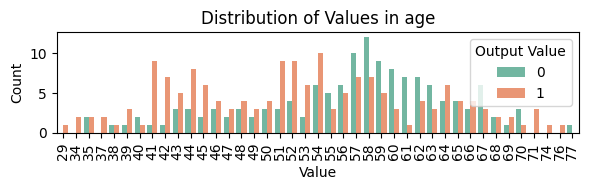

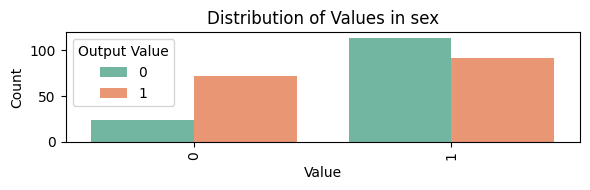

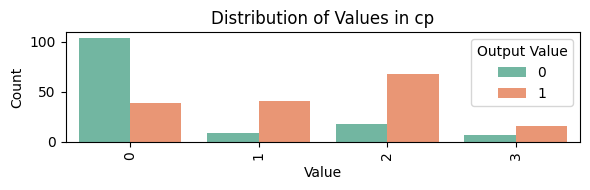

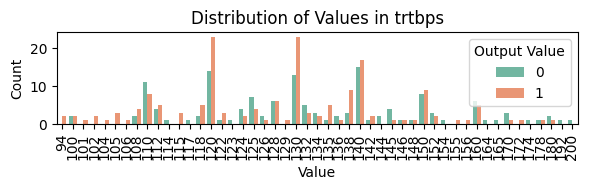

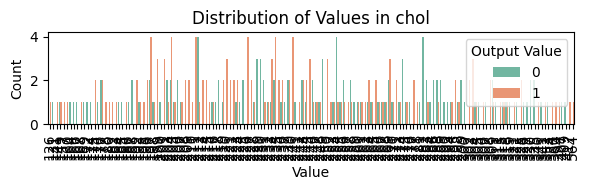

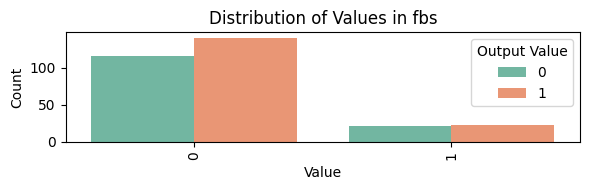

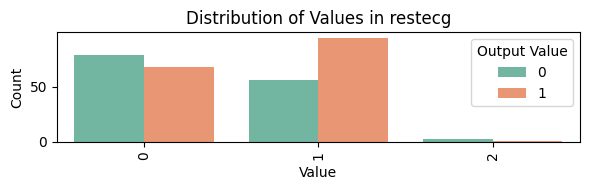

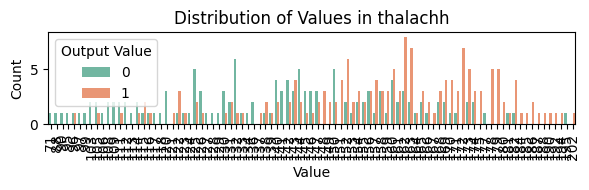

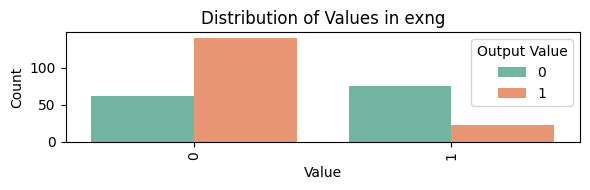

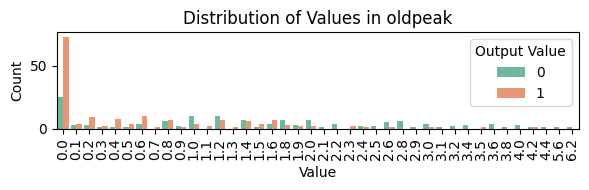

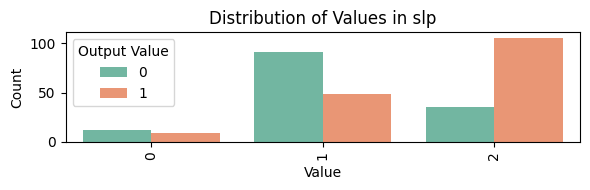

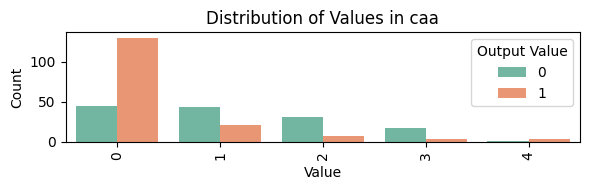

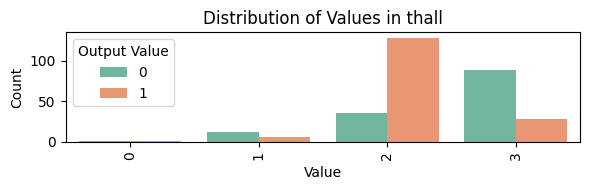

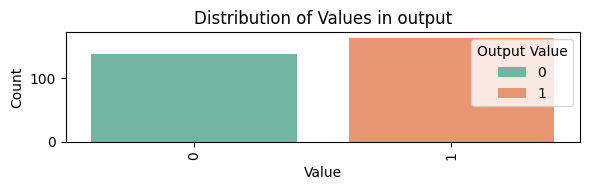

In [ ]:
for col in df.columns:
    plt.figure(figsize=(6, 2))
    sns.countplot(data=df, x=col, hue='output', palette='Set2')
    plt.title(f'Distribution of Values in {col}')
    plt.xlabel('Value')
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.legend(title='Output Value')
    plt.tight_layout()
    plt.show()

# feature scaling

<Axes: >

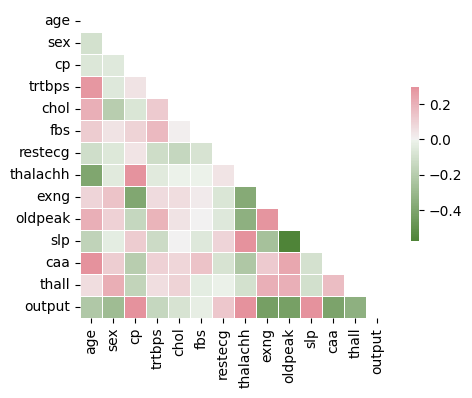

In [ ]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(6, 4))

cmap = sns.diverging_palette(120, 8, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
numeric_features = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exng', 'slp', 'caa', 'thall']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
polynomial_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = polynomial_features.fit_transform(X[numeric_features])

In [ ]:
pattern = '|'.join(numeric_features)  # 'age|trtbps|chol|thalachh|oldpeak'

poly_features = df.filter(regex=pattern)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X[poly_features.columns] = scaler.fit_transform(X[poly_features.columns])
X

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall
0,0.708333,1,3,0.481132,0.244292,1,0,0.603053,0,0.370968,0,0,1
1,0.166667,1,2,0.339623,0.283105,0,1,0.885496,0,0.564516,0,0,2
2,0.250000,0,1,0.339623,0.178082,0,0,0.770992,0,0.225806,2,0,2
3,0.562500,1,1,0.245283,0.251142,0,1,0.816794,0,0.129032,2,0,2
4,0.583333,0,0,0.245283,0.520548,0,1,0.702290,1,0.096774,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.583333,0,0,0.433962,0.262557,0,1,0.396947,1,0.032258,1,0,3
299,0.333333,1,3,0.150943,0.315068,0,1,0.465649,0,0.193548,1,0,3
300,0.812500,1,0,0.471698,0.152968,1,1,0.534351,0,0.548387,1,2,3
301,0.583333,1,0,0.339623,0.011416,0,1,0.335878,1,0.193548,1,1,3


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state = 14)

# Logistic Regression

In [ ]:
model = LogisticRegression(random_state=1234, penalty='l2', solver='liblinear', max_iter=800)
model.fit(X_train, y_train)

LogisticRegression(max_iter=800, random_state=1234, solver='liblinear')

In [ ]:
y_test_pred = model.predict(X_test)

accuracy score: 0.9344262295081968
Precision: 0.91
Recall: 0.97
F1 Score: 0.94


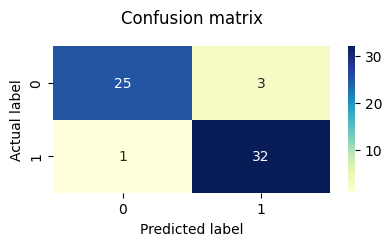

In [ ]:
result={}
result["logistic regression"]=model_eval(y_test,y_test_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, X,y, cv = 5)
print("cross-Validation Accuracy Score", scores.mean())

cross-Validation Accuracy Score 0.8342076502732241


# SVR

In [ ]:
from sklearn.svm import SVC
model_svm=SVC(kernel='rbf')

In [ ]:
model_svm.fit(X_train,y_train)

SVC()

In [ ]:
y_pred=model_svm.predict(X_test)

accuracy score: 0.9016393442622951
Precision: 0.86
Recall: 0.97
F1 Score: 0.91


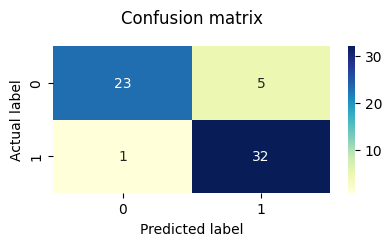

In [ ]:
result["svm"]=model_eval(y_test,y_pred)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model_svm, X,y, cv = 5)
print("cross-Validation Accuracy Score", scores.mean())

cross-Validation Accuracy Score 0.8442622950819672


# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=12,max_depth=6,max_leaf_nodes=13,max_features=3)
tree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=6, max_features=3, max_leaf_nodes=13,
                       random_state=12)

In [ ]:
y_predict=tree.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree, X,y, cv = 5)
print("cross-Validation Accuracy Score", scores.mean())

cross-Validation Accuracy Score 0.7416939890710382


accuracy score: 0.8524590163934426
Precision: 0.79
Recall: 1.00
F1 Score: 0.88


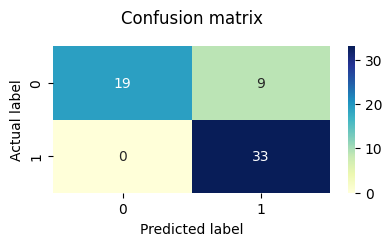

In [ ]:
result['decision tree']=model_eval(y_test,y_predict)

<Figure size 400x200 with 0 Axes>

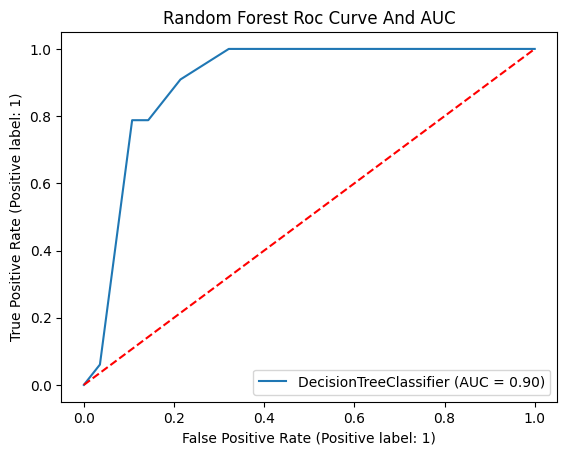

In [ ]:
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(4, 2))
RocCurveDisplay.from_estimator(tree,X_test,y_test)
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0,1], "r--")
plt.show()

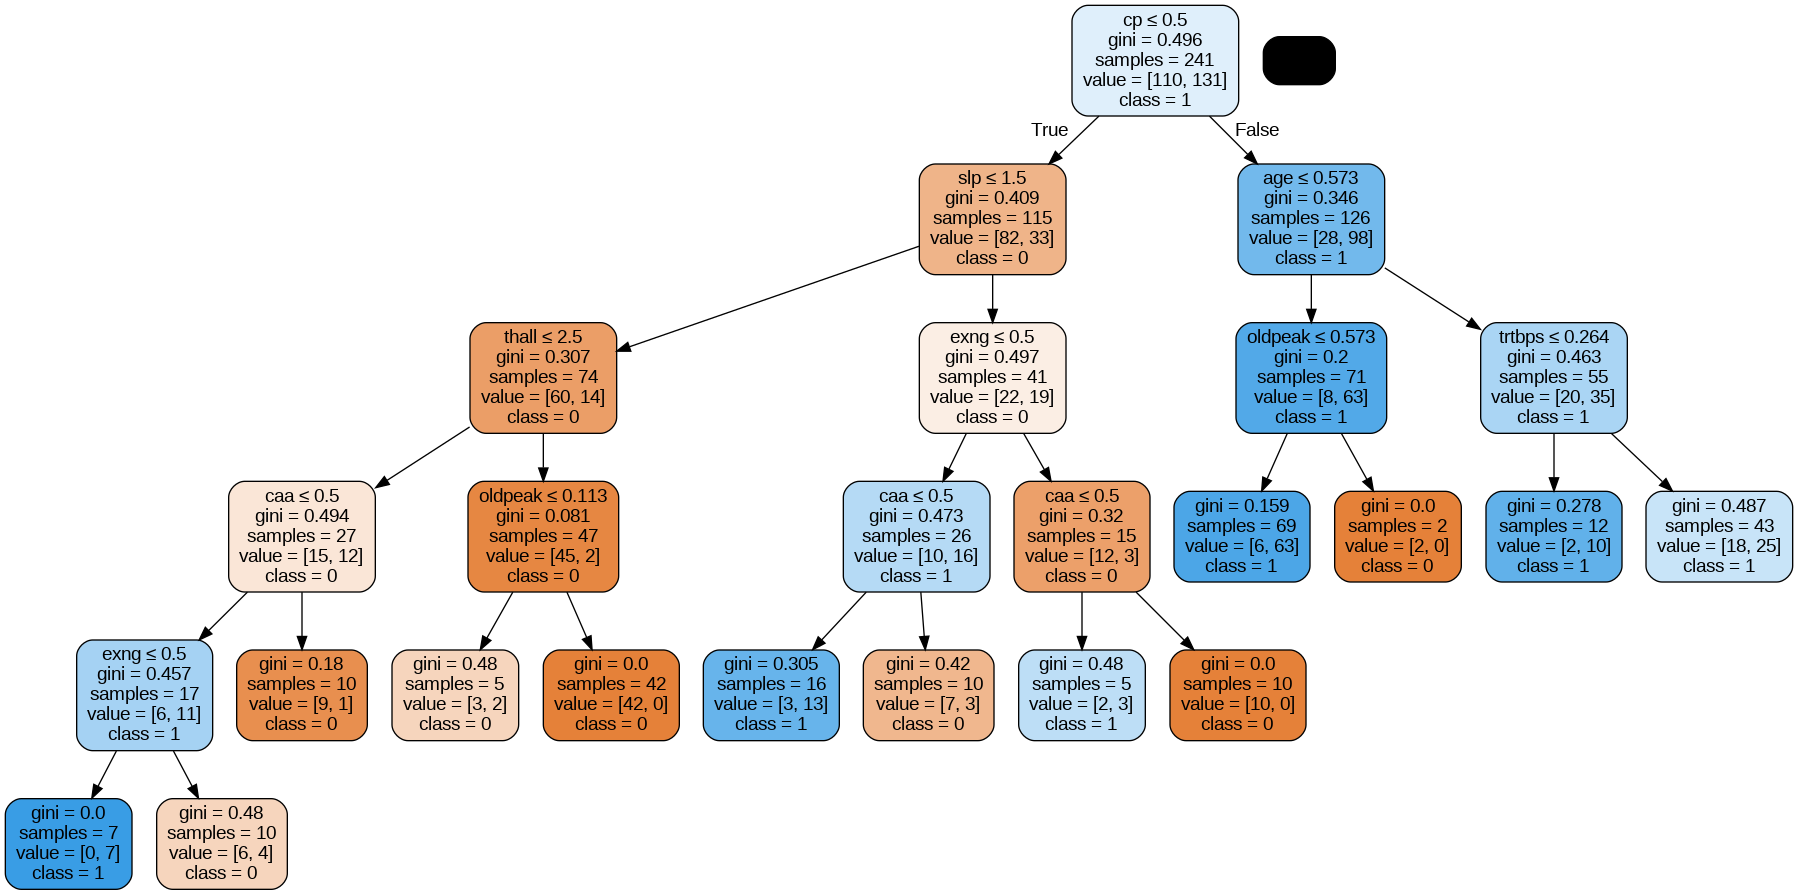

In [ ]:
from sklearn.tree import export_graphviz
import six
from io import StringIO
from IPython.display import Image
import pydotplus
fn=X.columns

dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,
                filled=True, rounded=True,
                special_characters=True,feature_names = fn,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('diabetes.png')
Image(graph.create_png())


# Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=124,n_estimators=500, n_jobs=-1)
forest.fit(X_train,y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=124)

In [ ]:
y_predt=forest.predict(X_test)

accuracy score: 0.9016393442622951
Precision: 0.86
Recall: 0.97
F1 Score: 0.91


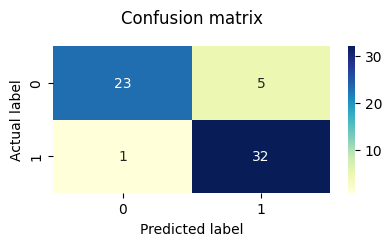

In [ ]:
result['Random forest']=model_eval(y_test,y_predt)

<Figure size 400x200 with 0 Axes>

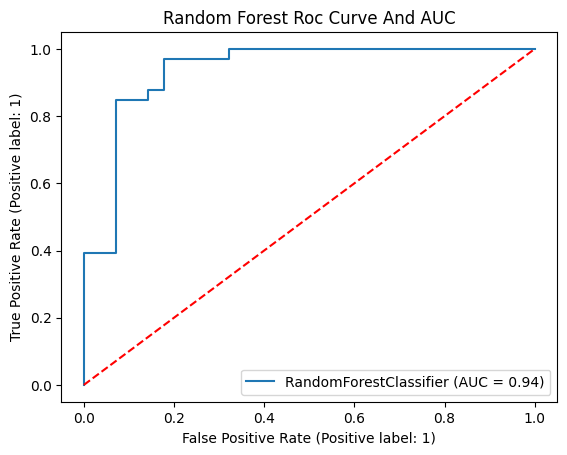

In [ ]:
plt.figure(figsize=(4, 2))
RocCurveDisplay.from_estimator(forest,X_test,y_test)
plt.title("Random Forest Roc Curve And AUC")
plt.plot([0, 1], [0,1], "r--")
plt.show()

# Bagging

accuracy score: 0.9016393442622951
Precision: 0.86
Recall: 0.97
F1 Score: 0.91


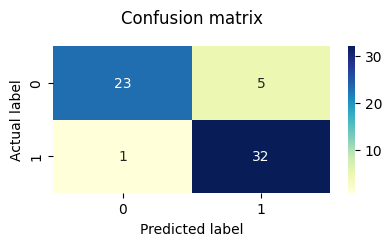

In [ ]:
from sklearn.ensemble import VotingClassifier
model1 = ('decision_tree', DecisionTreeClassifier(random_state=12,max_depth=6,max_leaf_nodes=13,max_features=3))
model2 = ('logistic_regression', LogisticRegression(random_state=1234, penalty='l2', solver='liblinear', max_iter=800))
model3 = ('svm', SVC(kernel='rbf',probability=True))
model4 = ('random_forest', RandomForestClassifier(random_state=124,n_estimators=500, n_jobs=-1))
voting_model = VotingClassifier(estimators=[model1, model2,model3,model4], voting='soft')

voting_model.fit(X_train, y_train)

final_preds = voting_model.predict(X_test)
result['bagging']=model_eval(y_test,final_preds)

In [ ]:
scores = cross_val_score(voting_model, X,y, cv = 5)
print("cross-Validation Accuracy Score", scores.mean())

cross-Validation Accuracy Score 0.8309836065573771


<Figure size 200x200 with 0 Axes>

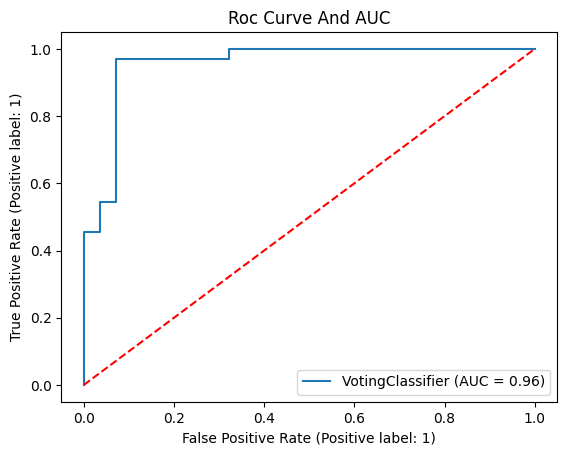

In [ ]:
plt.figure(figsize=(2, 2))
RocCurveDisplay.from_estimator(voting_model,X_test,y_test)
plt.title("Roc Curve And AUC")
plt.plot([0, 1], [0,1], "r--")
plt.show()

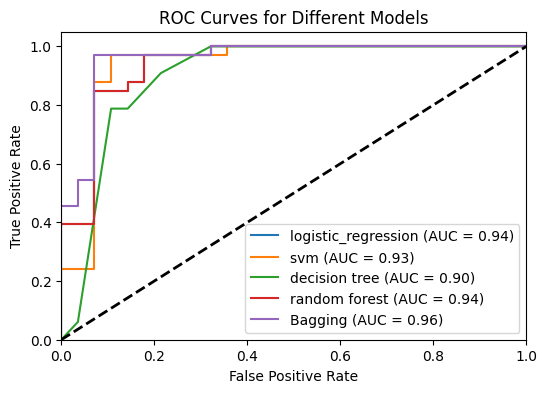

In [ ]:
fig, ax = plt.subplots(figsize=(6, 4))
models_m={'logistic_regression': model,
    'svm': model_svm,
    'decision tree': tree,
    'random forest': forest,
    'Bagging': voting_model}
for name in models_m:
    RocCurveDisplay.from_estimator(models_m[name], X_test, y_test, ax=ax, name=name)
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc='lower right')
plt.show()

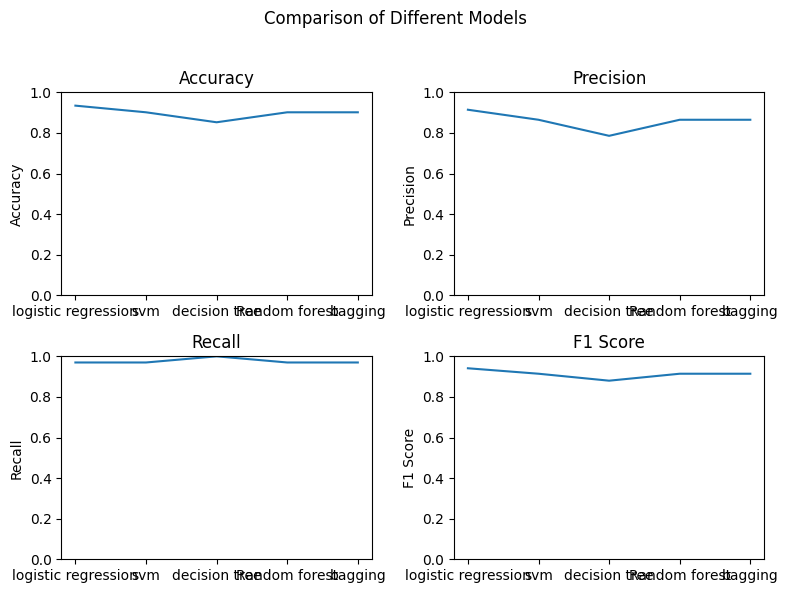

In [ ]:

results_df = pd.DataFrame(result).T

# Plot the results
fig, axes = plt.subplots(2, 2, figsize=(8, 6))
fig.suptitle('Comparison of Different Models')

metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
for ax, metric in zip(axes.ravel(), metrics):
    results_df[metric].plot(kind='line', ax=ax, title=metric)
    ax.set_ylabel(metric)
    ax.set_ylim(0, 1)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

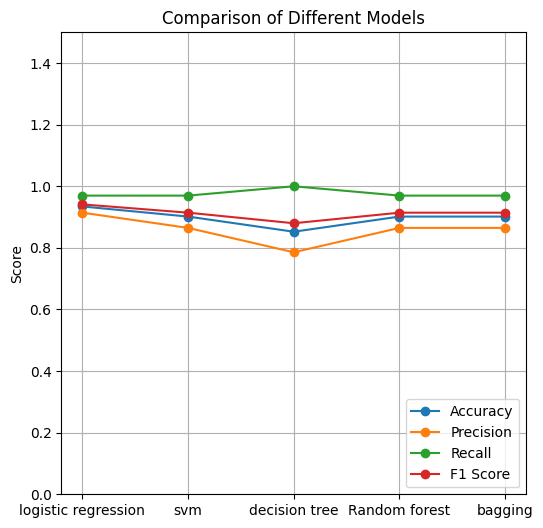

In [ ]:
fig, ax = plt.subplots(figsize=(6, 6))
results_df.plot(kind='line', marker='o', ax=ax)
ax.set_title('Comparison of Different Models')
ax.set_ylabel('Score')
ax.set_ylim(0, 1.5)
ax.set_xticks(range(len(results_df.index)))
ax.set_xticklabels(results_df.index)
plt.legend(loc='lower right')
plt.grid(True)
plt.show()